# I. Classification
In this exercise, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise. 
 
Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 
 
To load dataset, using the following code:

In [15]:
# Import nescessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits datasets: digits
digits = datasets.load_digits()

Before applying the classifier, we need to split the dataset: 

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create feature ad target arrays
X = digits.data
Y = digits.target

# Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

### 1. k-Nearest Neighbors
<ul><li> Implement kNN classification for the above dataset.</li>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# For specific k input
# Create feature and target arrays
feature = digits.data
target = digits.target

# Split into training and test set
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2, random_state=42, stratify= target)

# Create an k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(feature_train, target_train)

# Predict the response of the test dataset
target_pred = knn.predict(feature_test)

# Print the Accuracy
print('Accuracy: {0}'.format(knn.score(feature_test, target_test)))
print('Accuracy: ', metrics.accuracy_score(target_test, target_pred))

Accuracy: 0.9833333333333333
Accuracy:  0.9833333333333333


In [18]:
# For range of k input -> range of accuracy score

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Create an k-NN classifier with 7 neighbors
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Fit the classifier to the training data
    knn.fit(feature_train, target_train)
    
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(feature_train, target_train)
    
    #Accuracy score
    test_accuracy[i] = knn.score(feature_test, target_test)

<ul><li>  Compute and plot the accuracy scores by k values.</li>

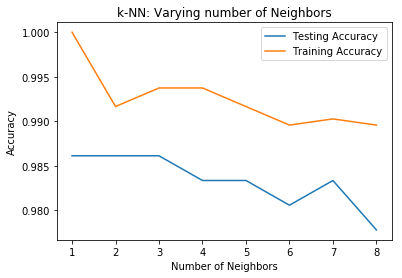

In [19]:
import matplotlib.pyplot as plt

#Generate plot
plt.title('k-NN: Varying number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Accuracy_knn = metrics.accuracy_score(target_test, target_pred)

<ul><li>  Make conclusions about which k is the best.</li>
    
    According to the graph, the gap between testing and training is smallest at k=2, so 2 is the best k 

### 2. Support Vector Machine 
<ul><li>Implement SVM classifier for MNIST dataset. </li><li>Compute and compare the accuracy scores for at least 3 different kernels by using metrics.classification_report.

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

kernel_list = ['sigmoid', 'rbf', 'poly']

for kernel_item in kernel_list:
    svclassifier = SVC(kernel = kernel_item)
    print('With kernel = ',kernel_item)
    svclassifier.fit(feature_train, target_train)
    target_pred = svclassifier.predict(feature_test)
    print(classification_report(target_test,target_pred))
    
Accuracy_SVC = metrics.accuracy_score(target_test, target_pred)


With kernel =  sigmoid


D:\Apps\Ananconda3.7\Anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        36
          1       0.33      0.06      0.10        36
          2       0.00      0.00      0.00        35
          3       0.10      1.00      0.19        37
          4       0.00      0.00      0.00        36
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        36
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        35
          9       0.00      0.00      0.00        36

avg / total       0.04      0.11      0.03       360

With kernel =  rbf
             precision    recall  f1-score   support

          0       1.00      0.58      0.74        36
          1       1.00      0.61      0.76        36
          2       1.00      0.63      0.77        35
          3       1.00      0.86      0.93        37
          4       1.00      0.56      0.71        36
          5       0.22 

<ul><li>Make conclusion about which kernel should be used in this case.
    
    If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

    Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while linear kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

### Naive Bayes
<ul><li>Compute the accuracy scores and plot the confusion matrix of the same dataset using Naïve Bayes classifier. <style: color = 'red'>Hint: from sklearn.metrics import confusion_matrix 

In [21]:
from sklearn.metrics import  confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

gbn = GaussianNB()
gbn.fit(feature_train, target_train)
target_pred = gbn.predict(feature_test)

Accuracy score:  0.8111111111111111


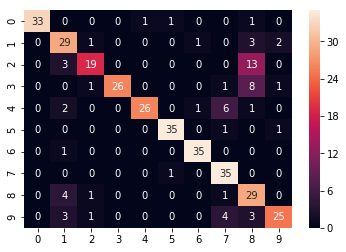

In [22]:
accuracy_score = metrics.accuracy_score(target_test, target_pred)
print('Accuracy score: ', accuracy_score)

array = confusion_matrix(target_test, target_pred)
sns.heatmap(array, annot=True, fmt=".0f")

plt.show()

In [23]:
print(Accuracy_SVC)
print(accuracy_score)
print(Accuracy_knn)

0.9861111111111112
0.8111111111111111
0.9833333333333333


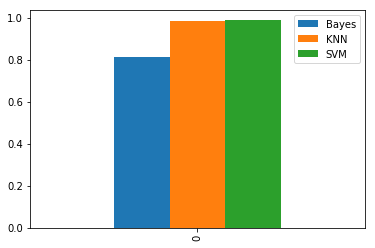

In [24]:
import pandas as pd

df = pd.DataFrame({'Bayes':[accuracy_score] ,
                  'KNN':[Accuracy_knn],
                  'SVM' : [Accuracy_SVC]})

df.plot.bar()

# II. Regression
### 1. Linear Regression
You will work with Gapminder data that in CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 
<ul><li>Use seaborn to visualize the data of Gapminder like following image: 

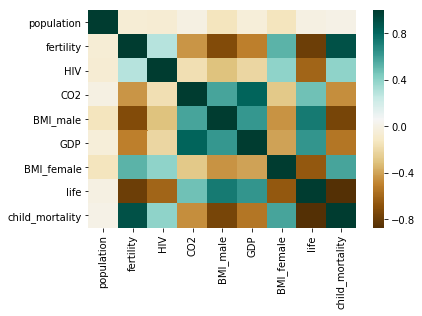

In [60]:
import pandas as pd
import seaborn as sn

df = pd.read_csv('gapminder.csv')

sn.heatmap(df.corr(), cmap='BrBG')

<ul><li> Apply linear regression with the 'fertility' feature to predict life expectancy.

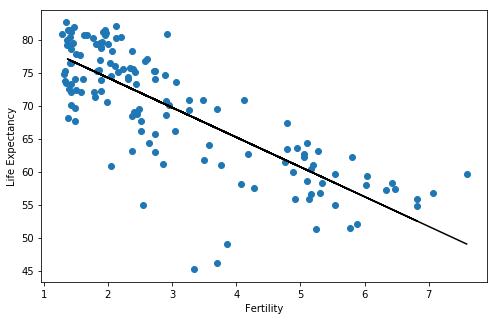

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = df['fertility'].values.reshape(-1,1)
y = df['life'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.figure(figsize=(8, 5))
plt.scatter(x='fertility', y='life', data=df)
plt.plot(X_test, y_pred, c='black')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

<ul><li> Apply linear regression with the all features to predict life expectancy. Compare the model score when using all features to one feature in previous step.
    <ul><li> One feature:

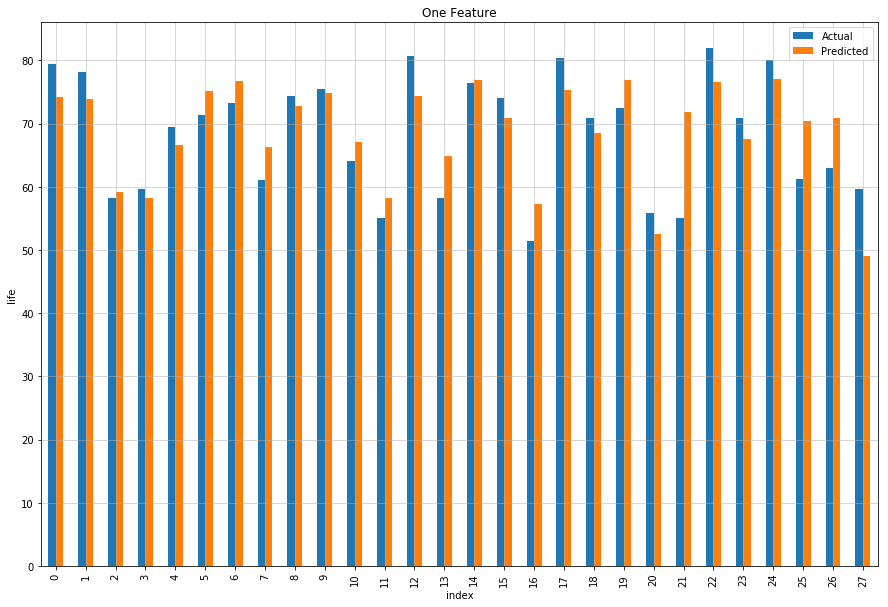

In [68]:
new_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
new_df.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.title('One Feature')
plt.xlabel('index')
plt.ylabel('life')
plt.show()

<ul><ul><li> All feature:

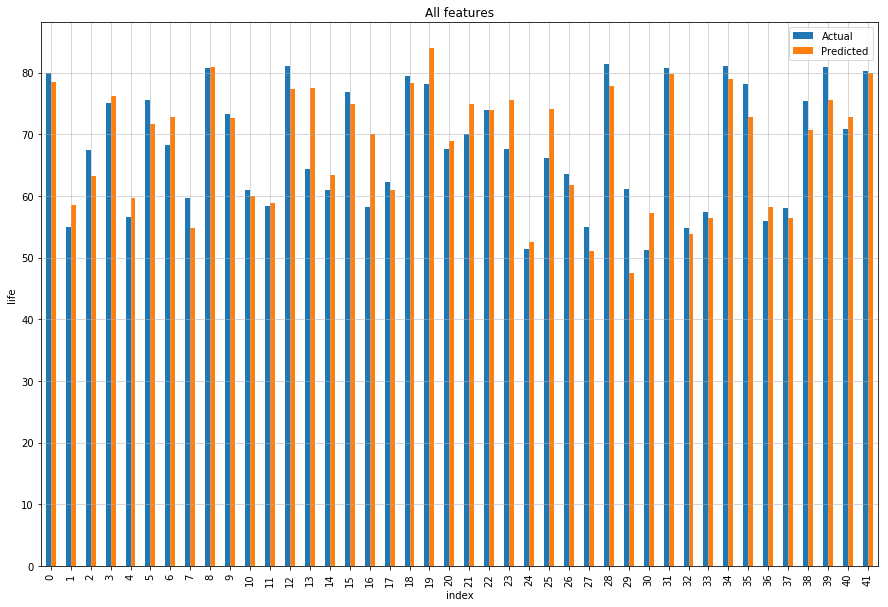

In [57]:
new_df = pd.read_csv('gapminder.csv')

feature_cols = ['population','fertility', 'HIV', 'CO2','BMI_male', 'BMI_female','child_mortality']
X = new_df[feature_cols]
y = new_df.life.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.title('All features')
plt.xlabel('index')
plt.ylabel('life')
plt.show()